Started with looking 

## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_one = pd.read_csv('./Job_data/DataAnalyst.csv')
print(df_one.shape)
df_one.head(3)

(2253, 16)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


In [3]:
df_two = pd.read_csv('./Job_data/DataScientist.csv')
print(df_two.shape)
df_two.head(3)

(3909, 17)


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True


There were three other datasets that I found, but they were dirtier and I figured these two sets were plenty enough without needing to burn a bunch of time on cleaning.

## Data Cleaning

### Dropping things

In [75]:
df.isna().sum()

index                   0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                  0
Company Name         6161
Location                0
Headquarters            0
Size                    0
Founded                 0
Type of ownership       0
Industry                0
Sector                  0
Revenue                 0
Competitors             0
Easy Apply              0
Estimate_minimum        0
Estimate_Maximum        0
temp                    0
dtype: int64

In [77]:
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Estimate_minimum,Estimate_Maximum,temp
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,NaN,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,66,<class 'str'>
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,NaN,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,False,37,66,<class 'str'>
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,NaN,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37,66,<class 'str'>
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,NaN,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,False,37,66,<class 'str'>
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,NaN,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,NaN,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,False,55,112,<class 'str'>
6158,3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,NaN,"Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,False,55,112,<class 'str'>
6159,3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,NaN,"Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,False,55,112,<class 'str'>
6160,3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,NaN,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,False,55,112,<class 'str'>


In [4]:
df_one.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df_two.drop(['Unnamed: 0','index'], axis = 1, inplace = True)

In [6]:
list_dfs = [df_one, df_two]
df = pd.concat(list_dfs)

In [7]:
df.reset_index(inplace = True)

In [8]:
df['Easy Apply'].value_counts()

-1      5918
True     244
Name: Easy Apply, dtype: int64

In [9]:
df['Easy Apply'].replace('-1', False, inplace = True)

In [1]:
def funt_min(x, regex = r'\$\d+K', front = '$'):
    cell = re.search(regex, x)
    if type(cell)== type(None):
        cell = 'Unknown'
    else:
        cell = cell.group()
        cell = cell.strip('K').strip(front)
    return cell

df['Salary_minimum'] = df['Salary Estimate'].map(lambda x: funt_min(x))

df['Salary_Maximum'] = df['Salary Estimate'].map(lambda x: funt_min(x, regex = r'-\$\d+K', front = '-$'))

NameError: name 'df' is not defined

In [11]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Estimate_minimum,Estimate_Maximum
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,66
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,False,37,66
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37,66
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,False,37,66
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66


In [12]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            1778
$10+ billion (USD)                   788
$100 to $500 million (USD)           556
$50 to $100 million (USD)            413
-1                                   392
$2 to $5 billion (USD)               340
$10 to $25 million (USD)             323
$1 to $5 million (USD)               281
$1 to $2 billion (USD)               267
$25 to $50 million (USD)             253
Less than $1 million (USD)           217
$500 million to $1 billion (USD)     193
$5 to $10 billion (USD)              189
$5 to $10 million (USD)              172
Name: Revenue, dtype: int64

In [13]:
df['Revenue'].replace('-1', 'Unknown / Non-Applicable', inplace = True)

In [38]:
df['Company Name'].map(lambda x: x[:-4])

0                Vera Institute of Justice
1       Visiting Nurse Service of New York
2                              Squarespace
3                                 Celerity
4                                  FanDuel
                       ...                
6157                  Tachyon Technologies
6158      Staffigo Technical Services, LLC
6159                        PDS Tech, Inc.
6160            Data Resource Technologies
6161                                   UCB
Name: Company Name, Length: 6161, dtype: object

In [42]:
df['Company Name'].map(lambda x: x[-4:]).value_counts().head(30)

\n3.9    442
\n3.7    422
\n4.1    391
\n3.6    387
\n3.8    368
\n4.0    329
\n3.5    301
\n5.0    291
\n3.4    286
\n3.3    263
\n3.2    227
\n4.2    201
\n3.1    181
\n4.3    174
\n4.5    155
\n4.4    122
\n3.0    122
\n4.6    120
\n2.9    103
\n2.8    101
\n4.7     82
\n4.8     71
Inc.      65
\n2.5     65
\n4.9     62
\n2.7     54
 LLC      52
\n2.6     41
 Inc      31
\n2.4     30
Name: Company Name, dtype: int64

In [51]:
mask = df['Rating'] == -1
df[mask]['Company Name'].map(lambda x: x[-4:]).value_counts().tail(30)

VA 5    1
pace    1
ling    1
plex    1
(US)    1
.com    1
isys    1
PAC     1
Well    1
 360    1
de_M    1
l US    1
sity    1
urer    1
ères    1
nced    1
airs    1
RATE    1
itas    1
gics    1
r RG    1
zops    1
acar    1
icor    1
iter    1
ific    1
stem    1
URCH    1
n TX    1
Corp    1
Name: Company Name, dtype: int64

In [55]:
mask = df['Rating'] == -1
df[mask]['Company Name'].map(lambda x: x[-4:]).value_counts()#.head(50)

Inc.    65
 LLC    52
 Inc    31
ions    18
fing    14
        ..
ific     1
stem     1
URCH     1
n TX     1
Corp     1
Name: Company Name, Length: 243, dtype: int64

In [74]:
mask = df['Rating'] != -1
df[mask]['Company Name'].map(lambda x: x[-4:]).value_counts().head(10)

TypeError: 'float' object is not subscriptable

In [73]:
def fun_map(x):
    if x[-4:-3] == "\n":
        x = x[:-4]
    return x
df['Company Name'] = df['Company Name'].map(lambda x: fun_map(x)).value_counts()

In [15]:
#mask = type(df['Company Name']) == type(float)
#df[mask]
df['temp'] = df['Company Name'].map(lambda x: type(x))


In [16]:
mask = df['temp'] == float
df[mask]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Estimate_minimum,Estimate_Maximum,temp
1860,1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",-1.0,NaN,"Mooresville, NC",-1,-1,-1,-1,-1,-1,Unknown / Non-Applicable,-1,False,53,99,<class 'float'>


In [37]:
 df.drop(1860, inplace = True)#.loc[1855:1865]

In [17]:
df['Company Name'].value_counts()

Staffigo Technical Services, LLC\n5.0    86
Apple\n4.1                               70
IBM\n3.7                                 59
Amazon\n3.9                              50
Diverse Lynx\n3.9                        47
                                         ..
Tarzana\n3.0                              1
Source of Future Technology Inc\n4.2      1
Latitude, Inc.\n4.0                       1
Management Solutions\n3.4                 1
Tecolote Research\n3.8                    1
Name: Company Name, Length: 2926, dtype: int64

In [18]:
print(df['Job Description'][3])#.head(3)

Requisition NumberRR-0001939
Remote:Yes
We collaborate. We create. We innovate.

Intrigued?

You’re a business professional with an innate curiosity that thrives in a dynamic and Agile environment. You appreciate teamwork, exemplify integrity, perseverance, flexibility, and a generosity of spirit… if this sounds like you, then please apply – we’d love to meet you!

Celerity is expanding and on the hunt for the savvy, creative, and analytically sound individuals that are motivated by solving complex problems. We’re in the business of transforming how people, process, and systems co-exist, while improving operational efficiencies and user-driven interactions. We work with groundbreaking companies, melding expertise in Digital Strategy, Technology, Creative, and Business Transformation.
The health and safety of our employees is our top priority. Due to the pandemic, all our employees are working remotely and we will be conducting candidate interviews by video. This position will continue 

## Natural Language Processing

In [19]:
# Imports
# Natural Language Processing libraries, initiations and functions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords


# Preprocessing
def preprocess(text):
    text = re.sub(r'[^a-zA-Z]',' ', text.lower())
    tokens = word_tokenize(text)
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return " ".join([lemmer.lemmatize(word) for word 
                     in tokens if len(word) > 1 and not word in stop_words])



# Cvec, Standard
cvec = CountVectorizer(analyzer = "word",
                       min_df = 2,
                       preprocessor = preprocess,
                       stop_words = 'english') 
# Cvec DF
#df_words = pd.DataFrame(cvec.fit_transform(df['Job Description']).todense(), 
#                        columns=cvec.get_feature_names())


In [20]:
df_words = pd.DataFrame(cvec.fit_transform(df['Job Description']).todense(), 
                        columns=cvec.get_feature_names())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [23]:
!pip install textblob

In [24]:
# Sentament

from textblob import TextBlob

def Sentamentize(text):
    return TextBlob(str(text)).sentiment.polarity

ModuleNotFoundError: No module named 'textblob'

In [25]:
df_words

,aa,aaa,aaai,aaalac,aab,aadhikariatbayonesolutionsdotcom,aahrpp,aam,aamericorps,aamva,...,zoom,zoox,zpd,zr,zsers,zuckerberg,zulily,zuora,zurich,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Most Common Words
def most_common_words(cveced_df):
    return cveced_df.sum().sort_values()[::-1]


In [27]:
series_most = most_common_words(df_words)

In [28]:
series_most.head(20)

data           61191
experience     31162
business       17709
work           16462
team           15577
skill          12383
year           10845
analysis       10582
ability         9542
development     8289
management      7846
science         7843
job             7816
project         7809
knowledge       7638
technology      7424
process         7327
support         7281
solution        7276
analytics       7251
dtype: int64

In [29]:
# NEEDS THE IMPORT
# LDA: Latent Dirichlet Allocation
from sklearn.decomposition import LatentDirichletAllocation
def LDA(df_column, num_topics = 3, num_words = 5):
    # cols are the words
    # rows are the topics
    topic_lists = []
    lda = LatentDirichletAllocation(n_components=num_topics, 
                         learning_method='online'
                   ) # Learning meathod stated for depreciation 
    lda.fit(cvec.fit_transform(df_column))
    for ix, topic in enumerate(lda.components_):
        topic_lists += [[cvec.get_feature_names()[i] for i 
              in lda.components_[ix].argsort()[:-num_words - 1:-1]]]

    return pd.DataFrame(topic_lists, columns=[ 'word_' + str(i) for i 
                                          in range(1, num_words+1)], 
                 index=range(1, num_topics + 1)) 

In [30]:
LDA(df['Job Description'], 5, 10)

,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
1,data,experience,business,skill,year,work,team,management,solution,ability
2,experience,position,work,application,job,information,year,data,required,service
3,status,employment,disability,gender,opportunity,equal,veteran,protected,national,law
4,data,experience,work,research,skill,ability,analysis,report,health,development
5,data,experience,team,learning,business,science,work,product,machine,model


In [31]:
LDA(df['Job Description'], 3, 7)

,word_1,word_2,word_3,word_4,word_5,word_6,word_7
1,data,experience,business,skill,work,management,ability
2,experience,work,research,employment,development,required,status
3,data,experience,team,business,work,analytics,learning


In [32]:
df.head(3)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Estimate_minimum,Estimate_Maximum,temp
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,66,<class 'str'>
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,False,37,66,<class 'str'>
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37,66,<class 'str'>


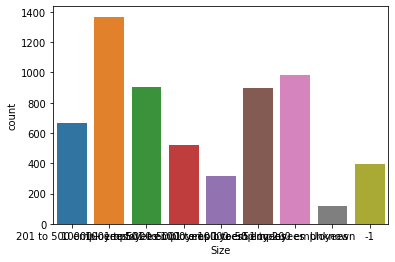

In [34]:
sns.countplot(df['Size'])